# 1D Heat equation
$u_t = 2.0 u_{xx}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils_0 import *

In [2]:
np.random.seed(0)
nx = 44
nt = 3000
a = 0
b = 1
t0 = 0
tf = 0.2
c = 2
dx = (b-a)/(nx-1)
dt = (tf-t0)/(nt-1)

x = np.arange(a,b+0.00000001,dx)
t = np.arange(t0,tf+0.00000001,dt)

s = (dt* c**2) /(dx**2)
s   # <0.5

0.49323107702567526

In [3]:
UA = np.zeros((nx, nt))

for j in range(nt):
    for i in range(nx):
        UA[i,j] = np.sin(np.pi*x[i])*np.exp(-np.pi**2 *t[j])

UN = np.zeros((nx, nt))
UN[:, 0] = np.sin(np.pi*x)

for j in range(0, nt-1):
    for i in range(1, nx-1):
        UN[i,j+1] = s*UN[i-1,j] + (1-2*s)*UN[i,j] + s*UN[i+1,j]

/tmp/ipykernel_76150/3904911135.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


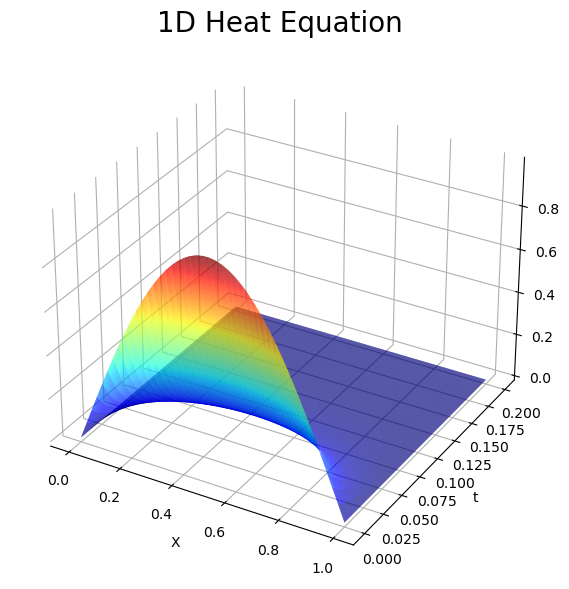

In [4]:
## plotting U field as a Surface
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, t)
ax.plot_surface(X, Y, UN.T, cmap='jet', rstride=1, cstride=1)
plt.title('1D Heat Equation', fontsize = 20)
plt.xlabel('X')
plt.ylabel('t');
# Get rid of colored axes planes

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# get rid of the grid as well:
ax.grid(True)


## 0% noise                                              

In [5]:
Ut, R, rhs_des = build_linear_system(UN, dt, dx, D=6, P=6, time_diff = 'FD', space_diff = 'FD')
['1'] + rhs_des[1:]

['1',
 'u',
 'u^2',
 'u^3',
 'u^4',
 'u^5',
 'u^6',
 'u_{x}',
 'uu_{x}',
 'u^2u_{x}',
 'u^3u_{x}',
 'u^4u_{x}',
 'u^5u_{x}',
 'u^6u_{x}',
 'u_{xx}',
 'uu_{xx}',
 'u^2u_{xx}',
 'u^3u_{xx}',
 'u^4u_{xx}',
 'u^5u_{xx}',
 'u^6u_{xx}',
 'u_{xxx}',
 'uu_{xxx}',
 'u^2u_{xxx}',
 'u^3u_{xxx}',
 'u^4u_{xxx}',
 'u^5u_{xxx}',
 'u^6u_{xxx}',
 'u_{xxxx}',
 'uu_{xxxx}',
 'u^2u_{xxxx}',
 'u^3u_{xxxx}',
 'u^4u_{xxxx}',
 'u^5u_{xxxx}',
 'u^6u_{xxxx}',
 'u_{xxxxx}',
 'uu_{xxxxx}',
 'u^2u_{xxxxx}',
 'u^3u_{xxxxx}',
 'u^4u_{xxxxx}',
 'u^5u_{xxxxx}',
 'u^6u_{xxxxx}',
 'u_{xxxxxx}',
 'uu_{xxxxxx}',
 'u^2u_{xxxxxx}',
 'u^3u_{xxxxxx}',
 'u^4u_{xxxxxx}',
 'u^5u_{xxxxxx}',
 'u^6u_{xxxxxx}']

In [6]:
R.shape

(132000, 49)

### STRidge                                              

In [7]:
wn = TrainSTRidge(R,Ut,0.0001,10)
print("PDE derived using STRidge")
print_pde(wn, rhs_des)

PDE derived using STRidge
u_t = (-39.512918 +0.000000i)u
    + (0.000000 +0.000000i)u_{xx}
   


In [8]:
True_theta = np.zeros(49)
True_theta[14] = 2

In [9]:
print('FIND-SINDy L2 (0% noise)  :',np.linalg.norm(True_theta - wn.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (0% noise)  : 19.781751126153004


### SINDy                                 

In [10]:
dxdt = np.column_stack(( Ut ))
lam = 0.1 
Xi = sindy(lam,R,dxdt)
print_pde(Xi, rhs_des)

u_t = (-39.512919 +0.000000i)u
   


In [11]:
print('SINDy L2 (0% noise)  :',np.linalg.norm(True_theta - Xi.reshape(-1))/np.linalg.norm(True_theta))

SINDy L2 (0% noise)  : 19.781751465196614


### Variational Bayes                                 

In [12]:
xdts = Ut.reshape(-1)
tol = 0.00001
pip = 0.9
verbosity = True
initz0 = initialization(wn)
DS = Variational_Bayes_code(R, xdts, initz0, tol, pip, verbosity)
print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])

/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 554483.8166682911
Iteration = 1  log(Likelihood) = 556255.9525233677
Iteration = 2  log(Likelihood) = 556255.962480139
Iteration = 3  log(Likelihood) = 556255.9624379602
OOPS!  log(like) decreasing!!
Iteration = 4  log(Likelihood) = 556255.9624378785
OOPS!  log(like) decreasing!!
Iteration = 5  log(Likelihood) = 556255.9624378785
zmean   [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [ 0 13]
Wsel   [-0.42388623  3.96233614]
Wcov   [1.25540069e-04 1.28999661e-06]


In [13]:
DS['zmean'][np.where(np.diag(DS['wCOV'])>1e-5)] = 0
DS['wmean'][np.where(np.diag(DS['wCOV'])>1e-5)] = 0
zmean = DS['zmean']
zmean[0] = 0

In [14]:
xdts = Ut.reshape(-1)
tol = 0.001
pip = 0.9
verbosity = True
initz0 = zmean
DS = Variational_Bayes_code(R, xdts, initz0, tol, pip, verbosity)
print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])

Iteration = 0  log(Likelihood) = 553973.5734851117
Iteration = 1  log(Likelihood) = 555725.8427222637
Iteration = 2  log(Likelihood) = 555725.8524538619
Iteration = 3  log(Likelihood) = 555725.8524847782
zmean   [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [13]
Wsel   [4.0053042]
Wcov   [4.02846337e-11]


In [15]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta = np.sqrt(DS['wmean'])
vb_theta[0] = 0
nl = R.shape[1]
zmean[0] = 0
print('VB L2 (0% noise)  :',np.linalg.norm(True_theta - vb_theta.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [2.00132561]
VB L2 (0% noise)  : 0.0006628053273807222


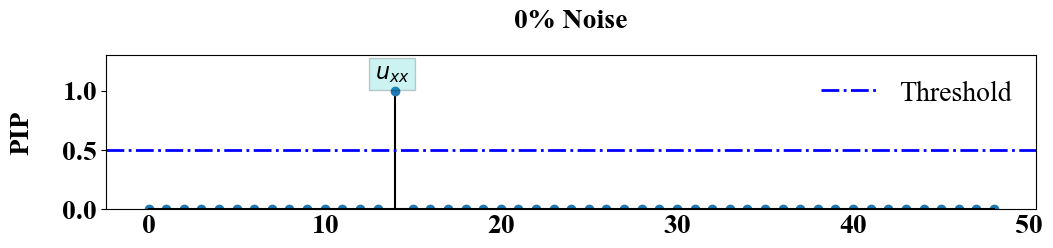

In [16]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (No noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('0% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


# 1% Noise

In [17]:
np.random.seed(0)
n = UN.shape[0]
m = UN.shape[1]
Un1 = UN + 0.01*np.std(UN)*np.random.randn(n,m)
Utn1, Rn1, rhs_des1 = build_linear_system(Un1, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 8)

### FIND-SINDy

In [18]:
wn1 = TrainSTRidge(Rn1,Utn1,0.1,6)
print("PDE derived using STRidge")
print_pde(wn1, rhs_des1)

PDE derived using STRidge
u_t = (-41.152949 +0.000000i)u
    + (-0.168918 +0.000000i)u_{xx}
   


In [19]:
print('FIND-SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - wn1.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (1% noise)  : 20.605032320688423


### SINDy

In [20]:
dxdt = np.column_stack(( Utn1 ))
lam = 20 
Xi_n1 = sindy(lam,Rn1,dxdt)
print_pde(Xi_n1, rhs_des)

u_t = (-39.502791 +0.000000i)u
    + (59.439251 +0.000000i)u^2u_{x}
    + (-461.284546 +0.000000i)u^3u_{x}
    + (1274.180010 +0.000000i)u^4u_{x}
    + (-1492.084861 +0.000000i)u^5u_{x}
    + (628.382218 +0.000000i)u^6u_{x}
   


In [21]:
print('SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - Xi_n1.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (1% noise)  : 1056.2429961717573


### Variational Bayes

In [22]:
xdts = Utn1.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
initz0 = initialization(wn1)

DS = Variational_Bayes_code(Rn1, xdts, initz0, tol, pip, verbosity)
print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])

Iteration = 0  log(Likelihood) = -18448.556845721832
Iteration = 1  log(Likelihood) = -18297.92279596008
Iteration = 2  log(Likelihood) = -18297.922585672237
Iteration = 3  log(Likelihood) = -18297.922585668908
zmean   [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [ 0 13]
Wsel   [-38.36007752   0.11448988]
Wcov   [0.90435729 0.00926634]


In [23]:
DS['zmean'][np.where(np.diag(DS['wCOV'])>1e-1)] = 0
DS['wmean'][np.where(np.diag(DS['wCOV'])>1e-1)] = 0
zmean1_init = DS['zmean']

In [24]:
xdts = Utn1.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
initz0 = zmean1_init

DS = Variational_Bayes_code(Rn1, xdts, initz0, tol, pip, verbosity)
print(DS['zmean']) 
print(DS['wmean']) 
print(DS['modelIdx']) 
print(DS['Wsel']) 

Iteration = 0  log(Likelihood) = -19158.167957373986
Iteration = 1  log(Likelihood) = -19004.3613271854
Iteration = 2  log(Likelihood) = -19004.361116857435
Iteration = 3  log(Likelihood) = -19004.361116853834
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[-0.02294281  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.99174279  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[13]
[3.99174279]


In [25]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n1 = DS['wmean']
vb_theta_n1[0] = 0
vb_theta_n1 = np.sqrt(vb_theta_n1)
zmean1 = DS['zmean']
zmean1[0] = 0
print('VB L2 (1% noise)  :',np.linalg.norm(True_theta - vb_theta_n1.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [1.99793463]
VB L2 (1% noise)  : 0.0010326844948440606


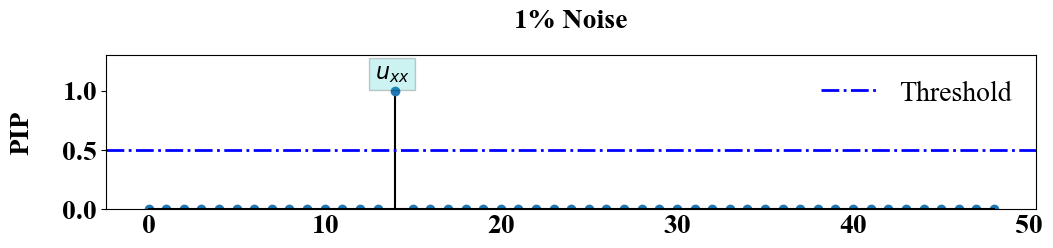

In [26]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean1, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('1% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 2% Noise

In [27]:
np.random.seed(0)
Un2 = UN + 0.02*np.std(UN)*np.random.randn(n,m)
Utn2, Rn2, rhs_des2 = build_linear_system(Un2, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 7)

### FIND-SINDy

In [28]:
wn2 = TrainSTRidge(Rn2,Utn2,0.01,10)
print("PDE derived using STRidge")
print_pde(wn2, rhs_des1)

PDE derived using STRidge
u_t = (-41.003202 +0.000000i)u
    + (-0.156833 +0.000000i)u_{xx}
   


In [29]:
print('FIND-SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - wn2.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (2% noise)  : 20.529944824804765


### SINDy

In [30]:
dxdt = np.column_stack(( Utn2 ))
lam = 50
Xi_n2 = sindy(lam,Rn2,dxdt)
print_pde(Xi_n2, rhs_des)

u_t = (-763.040147 +0.000000i)u^2
    + (5117.867487 +0.000000i)u^3
    + (-14490.083584 +0.000000i)u^4
    + (17740.049993 +0.000000i)u^5
    + (-7759.003712 +0.000000i)u^6
    + (122.874022 +0.000000i)u^2u_{x}
    + (-934.145462 +0.000000i)u^3u_{x}
    + (2550.225006 +0.000000i)u^4u_{x}
    + (-2965.456644 +0.000000i)u^5u_{x}
    + (1243.421115 +0.000000i)u^6u_{x}
    + (164.754852 +0.000000i)u^3u_{xx}
    + (-833.641948 +0.000000i)u^4u_{xx}
    + (1314.974920 +0.000000i)u^5u_{xx}
    + (-659.325635 +0.000000i)u^6u_{xx}
   


In [31]:
print('SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - Xi_n2.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (2% noise)  : 12572.452141788232


### Variational Bayes

In [32]:
xdts = Utn2.reshape(-1)
tol = 0.001
pip = 0.9
verbosity = True
initz0 = initialization(wn2)

DS = Variational_Bayes_code(Rn2, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = -26587.640248914766
Iteration = 1  log(Likelihood) = -26403.248667981676
Iteration = 2  log(Likelihood) = -26403.24845744633
zmean [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-5.99159531e-03 -3.73237976e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.17832133e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

In [33]:
DS['zmean'][np.where(abs(np.diag(DS['wCOV']))>1e-1)] = 0
DS['wmean'][np.where(abs(np.diag(DS['wCOV']))>1e-1)] = 0
zmean2_i = DS['zmean']
zmean2_i[0] = 0

In [34]:
xdts = Utn2.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
initz0 = zmean2_i

DS = Variational_Bayes_code(Rn2, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = -26744.255455914445
Iteration = 1  log(Likelihood) = -26558.983502149422
Iteration = 2  log(Likelihood) = -26558.983291611086
Iteration = 3  log(Likelihood) = -26558.983291607427
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.01726256  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.99459158  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [3.99459158]
Wcov [0.00011237]


In [35]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n2 = DS['wmean']
vb_theta_n2[0] = 0
vb_theta_n2 = np.sqrt(vb_theta_n2)
zmean2 = DS['zmean']
zmean2[0] = 0
print('VB L2 (2% noise)  :',np.linalg.norm(True_theta - vb_theta_n2.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [1.99864744]
VB L2 (2% noise)  : 0.0006762814075862433


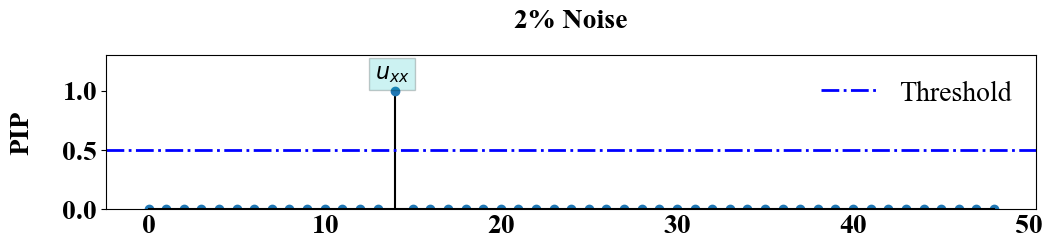

In [36]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean2, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('2% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 5% Noise

In [37]:
np.random.seed(0)
Un5 = UN + 0.05*np.std(UN)*np.random.randn(n,m)
Utn5, Rn5, rhs_des5 = build_linear_system(Un5, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 7)

### FIND-SINDy

In [38]:
wn5 = TrainSTRidge(Rn5,Utn5,0.1,10)
print("PDE derived using STRidge")
print_pde(wn5, rhs_des1)

PDE derived using STRidge
u_t = (-40.896118 +0.000000i)u
    + (-0.157488 +0.000000i)u_{xx}
   


In [39]:
print('FIND-SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - wn5.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (5% noise)  : 20.47649378674586


### SINDy

In [40]:
dxdt = np.column_stack(( Utn5 ))
lam = 50 
Xi_n5 = sindy(lam,Rn5,dxdt)
print_pde(Xi_n5, rhs_des)

u_t = (-740.798702 +0.000000i)u^2
    + (4849.060262 +0.000000i)u^3
    + (-13550.315484 +0.000000i)u^4
    + (16484.588786 +0.000000i)u^5
    + (-7191.107971 +0.000000i)u^6
    + (271.367712 +0.000000i)u^2u_{x}
    + (-1990.667140 +0.000000i)u^3u_{x}
    + (5348.554262 +0.000000i)u^4u_{x}
    + (-6183.021458 +0.000000i)u^5u_{x}
    + (2590.083616 +0.000000i)u^6u_{x}
    + (140.697201 +0.000000i)u^3u_{xx}
    + (-720.584527 +0.000000i)u^4u_{xx}
    + (1146.473907 +0.000000i)u^5u_{xx}
    + (-578.885674 +0.000000i)u^6u_{xx}
   


In [41]:
print('SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - Xi_n5.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (5% noise)  : 12358.16722114912


### Variational Bayes

In [42]:
xdts = Utn5.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
zmean5_i = DS['zmean']
zmean5_i[0] = 0
initz0 = zmean5_i

DS = Variational_Bayes_code(Rn5, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = -37561.21691184638
Iteration = 1  log(Likelihood) = -37331.065253294575
Iteration = 2  log(Likelihood) = -37331.065042688664
Iteration = 3  log(Likelihood) = -37331.06504268503
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.10040633  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.93166253  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [3.93166253]
Wcov [0.0006936]


In [43]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n5 = DS['wmean']
vb_theta_n5[0] = 0
vb_theta_n5 = np.sqrt(vb_theta_n5)
zmean5 = DS['zmean']
zmean5[0] = 0
print('VB L2 (5% noise)  :',np.linalg.norm(True_theta - vb_theta_n5.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [1.98284203]
VB L2 (5% noise)  : 0.00857898364313281


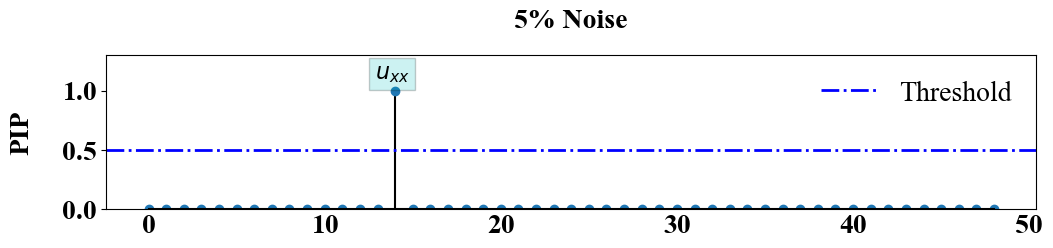

In [44]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean5, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('5% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


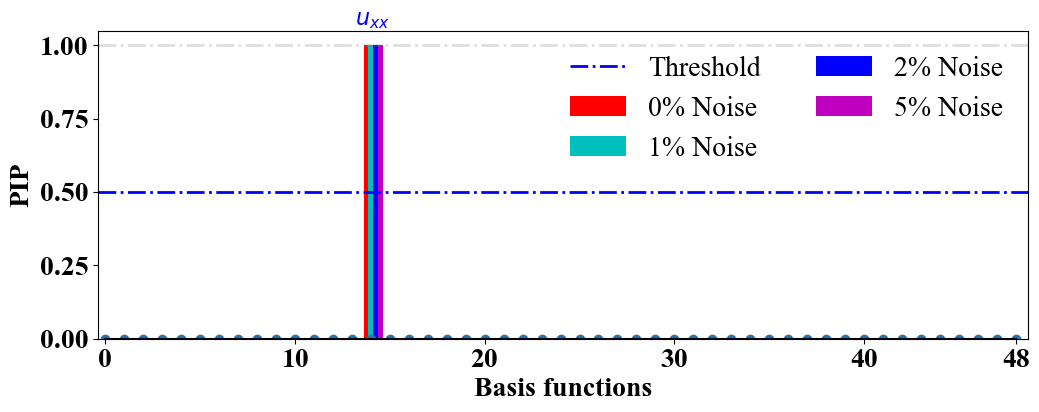

In [45]:
fig = plt.figure(figsize=(12,4))
plt.stem(xr, zmean5*0, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.bar(xr - 0.25, zmean, color = 'r', width = 0.25, label='0% Noise')
plt.bar(xr + 0.0, zmean1, color = 'c', width = 0.25, label='1% Noise')
plt.bar(xr + 0.25, zmean2, color = 'b', width = 0.25, label='2% Noise')
plt.bar(xr + 0.50, zmean5, color = 'm', width = 0.25, label='5% Noise')
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')
plt.axhline(y=1.0, color='grey', linestyle='-.', alpha=0.25, linewidth=2)

plt.xlabel('Basis functions', fontweight='bold')
plt.ylabel('PIP', fontweight='bold')
plt.grid(False)
plt.ylim(0, 1.05)

plt.xticks([0, 10, 20, 30, 40, 48], fontweight='bold')
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both')
plt.margins(0)

plt.text(15, 1.07, "$u_{xx}$", color='blue', fontsize=16, ha='right')

plt.legend(loc='upper right', ncol=2, frameon=False, fontsize=20)

plt.show()
fig.savefig('images/1D_Heat_combined.pdf',format='pdf',dpi=600,bbox_inches='tight')

## 10% Noise

In [46]:
np.random.seed(0)
Un10 = UN + 0.10*np.std(UN)*np.random.randn(n,m)
Utn10, Rn10, rhs_des10 = build_linear_system(Un10, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 7)

### FIND-SINDy

In [47]:
wn10 = TrainSTRidge(Rn10,Utn10,0.1,10)
print("PDE derived using STRidge")
print_pde(wn10, rhs_des10)

PDE derived using STRidge
u_t = (-40.645372 +0.000000i)u
    + (-0.158574 +0.000000i)u_{xx}
   


In [48]:
print('FIND-SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - wn10.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (10% noise)  : 20.35132470675718


### SINDy

In [49]:
dxdt = np.column_stack(( Utn10 ))
lam = 50 
Xi_n10 = sindy(lam,Rn10,dxdt)
print_pde(Xi_n10, rhs_des10)

u_t = (-676.448098 +0.000000i)u^2
    + (4132.402925 +0.000000i)u^3
    + (-11087.980462 +0.000000i)u^4
    + (13168.457153 +0.000000i)u^5
    + (-5658.711393 +0.000000i)u^6
    + (295.697914 +0.000000i)u^2u_{x}
    + (-1985.441771 +0.000000i)u^3u_{x}
    + (5195.667626 +0.000000i)u^4u_{x}
    + (-6042.403929 +0.000000i)u^5u_{x}
    + (2580.919026 +0.000000i)u^6u_{x}
    + (91.690600 +0.000000i)u^3u_{xx}
    + (-484.184828 +0.000000i)u^4u_{xx}
    + (783.974008 +0.000000i)u^5u_{xx}
    + (-400.486748 +0.000000i)u^6u_{xx}
   


In [50]:
print('SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - Xi_n10.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (10% noise)  : 10260.61575537711


### Variational Bayes

In [51]:
xdts = Utn10.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
zmean10_i = DS['zmean']
zmean10_i[0] = 0
initz0 = zmean10_i

DS = Variational_Bayes_code(Rn10, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = -45733.97420536951


/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 1  log(Likelihood) = -45469.91135783412
Iteration = 2  log(Likelihood) = -45469.91114721855
Iteration = 3  log(Likelihood) = -45469.911147214916
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.37387405  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.71051943  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [3.71051943]
Wcov [0.00263134]


In [52]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n10 = DS['wmean']
vb_theta_n10[0] = 0
vb_theta_n10 = np.sqrt(vb_theta_n10)
zmean10 = DS['zmean']
zmean10[0] = 0
print('VB L2 (10% noise)  :',np.linalg.norm(True_theta - vb_theta_n10.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [1.92627086]
VB L2 (10% noise)  : 0.0368645690200915


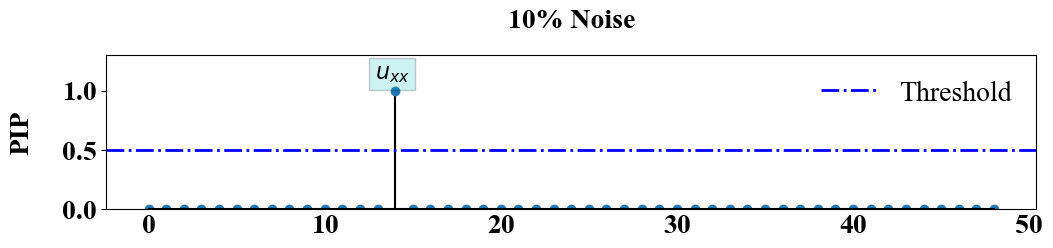

In [53]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean10, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('10% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 15% Noise

In [54]:
np.random.seed(0)
Un15 = UN + 0.15*np.std(UN)*np.random.randn(n,m)
Utn15, Rn15, rhs_des15 = build_linear_system(Un15, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 7)

### FIND-SINDy

In [55]:
wn15 = TrainSTRidge(Rn15,Utn15,0.1,8)
print("PDE derived using STRidge")
print_pde(wn15, rhs_des15)

PDE derived using STRidge
u_t = (-40.306529 +0.000000i)u
    + (-0.159651 +0.000000i)u_{xx}
   


In [56]:
print('FIND-SINDy L2 (15% noise)  :',np.linalg.norm(True_theta - wn15.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (15% noise)  : 20.182172846921244


### SINDy

In [57]:
dxdt = np.column_stack(( Utn15 ))
lam = 20
Xi_n15 = sindy(lam,Rn15,dxdt)
print_pde(Xi_n15, rhs_des15)

u_t = (-546.419720 +0.000000i)u^2
    + (2736.342314 +0.000000i)u^3
    + (-6449.623775 +0.000000i)u^4
    + (7085.733538 +0.000000i)u^5
    + (-2905.011617 +0.000000i)u^6
    + (82.413614 +0.000000i)uu_{x}
    + (-814.450451 +0.000000i)u^2u_{x}
    + (3343.088713 +0.000000i)u^3u_{x}
    + (-6178.170295 +0.000000i)u^4u_{x}
    + (5034.100334 +0.000000i)u^5u_{x}
    + (-1440.529073 +0.000000i)u^6u_{x}
    + (-56.141467 +0.000000i)u^4u_{xx}
    + (143.573244 +0.000000i)u^5u_{xx}
    + (-91.212715 +0.000000i)u^6u_{xx}
   


In [58]:
print('SINDy L2 (15% noise)  :',np.linalg.norm(True_theta - Xi_n15.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (15% noise)  : 6809.846434397652


### Variational Bayes

In [59]:
xdts = Utn15.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
zmean15_i = DS['zmean']
zmean15_i[0] = 0
initz0 = zmean15_i

DS = Variational_Bayes_code(Rn15, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = -50503.118886661956
Iteration = 1  log(Likelihood) = -50219.267336448414
Iteration = 2  log(Likelihood) = -50219.26712583104
Iteration = 3  log(Likelihood) = -50219.26712582742
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-0.76766599  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.38430054  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [3.38430054]
Wcov [0.00542372]


In [60]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n15 = DS['wmean']
vb_theta_n15[0] = 0
vb_theta_n15 = np.sqrt(vb_theta_n15)
zmean15 = DS['zmean']
zmean15[0] = 0

print('VB L2 (15% noise)  :',np.linalg.norm(True_theta - vb_theta_n15.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [1.83964685]
VB L2 (15% noise)  : 0.08017657424227098


In [61]:
print_pde(vb_theta_n15, rhs_des15)

u_t = (1.839647 +0.000000i)u_{xx}
   


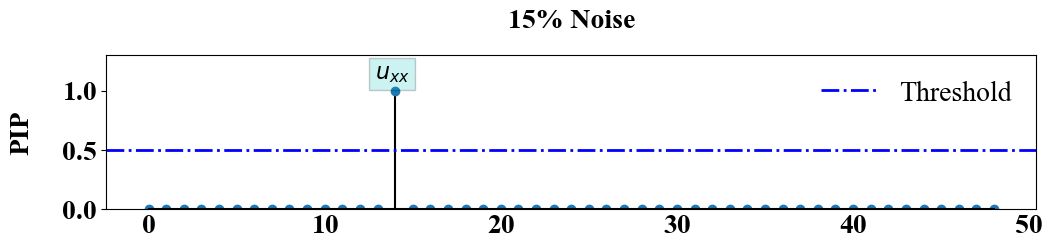

In [62]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean15, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('15% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 20% Noise

In [63]:
np.random.seed(0)
Un20 = UN + 0.20*np.std(UN)*np.random.randn(n,m)
Utn20, Rn20, rhs_des20 = build_linear_system(Un20, dt, dx, D=6, P=6, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 30, deg_x = 7)

### FIND-SINDy

In [64]:
wn20 = TrainSTRidge(Rn20,Utn20,0.2,8)
print("PDE derived using STRidge")
print_pde(wn20, rhs_des20)

PDE derived using STRidge
u_t = (-39.883208 +0.000000i)u
    + (-0.160709 +0.000000i)u_{xx}
   


In [65]:
print('FIND-SINDy L2 (20% noise)  :',np.linalg.norm(True_theta - wn20.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (20% noise)  : 19.97084716088531


### SINDy

In [66]:
dxdt = np.column_stack(( Utn20 ))
lam = 20
Xi_n20 = sindy(lam,Rn20,dxdt)
print_pde(Xi_n20, rhs_des20)

u_t = (-429.151075 +0.000000i)u^2
    + (1627.807165 +0.000000i)u^3
    + (-2887.147112 +0.000000i)u^4
    + (2431.604213 +0.000000i)u^5
    + (-786.030185 +0.000000i)u^6
    + (56.374425 +0.000000i)uu_{x}
    + (-511.931446 +0.000000i)u^2u_{x}
    + (2351.433812 +0.000000i)u^3u_{x}
    + (-4874.716762 +0.000000i)u^4u_{x}
    + (4389.421862 +0.000000i)u^5u_{x}
    + (-1391.368033 +0.000000i)u^6u_{x}
    + (-37.730386 +0.000000i)u^3u_{xx}
    + (143.730470 +0.000000i)u^4u_{xx}
    + (-182.675928 +0.000000i)u^5u_{xx}
    + (76.591109 +0.000000i)u^6u_{xx}
   


In [67]:
print('SINDy L2 (20% noise)  :',np.linalg.norm(True_theta - Xi_n20.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (20% noise)  : 4138.891643059658


### Variational Bayes

In [68]:
xdts = Utn20.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
zmean20_i = DS['zmean']
zmean20_i[0] = 0
initz0 = zmean20_i

DS = Variational_Bayes_code(Rn20, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = -53878.12626107276
Iteration = 1  log(Likelihood) = -53580.27079594722
Iteration = 2  log(Likelihood) = -53580.2705853292
Iteration = 3  log(Likelihood) = -53580.2705853256
zmean [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-1.2180712   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.00692706  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
modelId [13]
Wsel [3.00692706]
Wcov [0.0086044]


In [69]:
print('alpha :',np.sqrt(DS['Wsel']))
vb_theta_n20 = DS['wmean']
vb_theta_n20[0] = 0
vb_theta_n20 = np.sqrt(vb_theta_n20)
zmean20 = DS['zmean']
zmean20[0] = 0

print('VB L2 (20% noise)  :',np.linalg.norm(True_theta - vb_theta_n20.reshape(-1))/np.linalg.norm(True_theta) )

alpha : [1.73404932]
VB L2 (20% noise)  : 0.1329753384298883


In [70]:
print_pde(vb_theta_n20, rhs_des20)

u_t = (1.734049 +0.000000i)u_{xx}
   


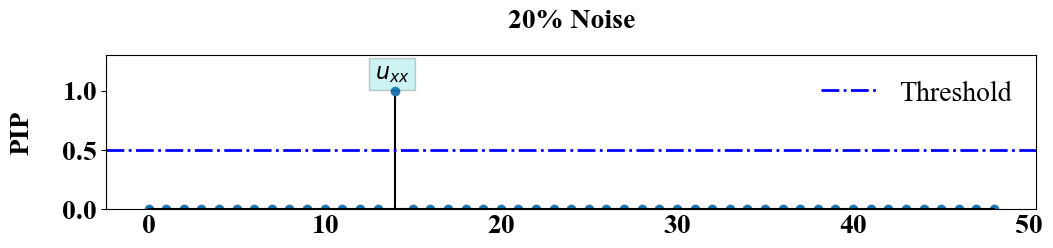

In [71]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean20, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('20% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(14.8, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


# Prediction

In [72]:
c = 2
def Prediction(c):
    nx = 44
    nt = 3000
    a = 0
    b = 1
    t0 = 0
    tf = 0.2
    dx = (b-a)/(nx-1)
    dt = (tf-t0)/(nt-1)

    x = np.arange(a,b+0.00000001,dx)
    t = np.arange(t0,tf+0.00000001,dt)

    s = (dt* c**2) /(dx**2)
    s   # <0.5

    UN = np.zeros((nx, nt))
    UN[:, 0] = np.sin(np.pi*x)

    for j in range(0, nt-1):
        for i in range(1, nx-1):
            UN[i,j+1] = s*UN[i-1,j] + (1-2*s)*UN[i,j] + s*UN[i+1,j]
            
    return UN

In [73]:
mean = 2.00132561
std = 0.00000634
MCMC = 100
pred_arr = []

for i in range (MCMC):
    theta = np.random.normal(loc = mean, scale = std)
    pred_arr.append(Prediction(theta))
    
pred_arr = np.array(pred_arr)
UN_True = Prediction(c)
UN_pred = Prediction(mean)
mu_pred = np.mean(pred_arr, axis=0)
std_pred = np.std(pred_arr, axis=0)
up = mu_pred + 2*std_pred
down = mu_pred - 2*std_pred

nx = 44
nt = 3000
a = 0
b = 1
t0 = 0
tf = 0.2
dx = (b-a)/(nx-1)
dt = (tf-t0)/(nt-1)

x = np.arange(a,b+0.00000001,dx)
t = np.arange(t0,tf+0.00000001,dt)
X, Y = np.meshgrid(t, x)

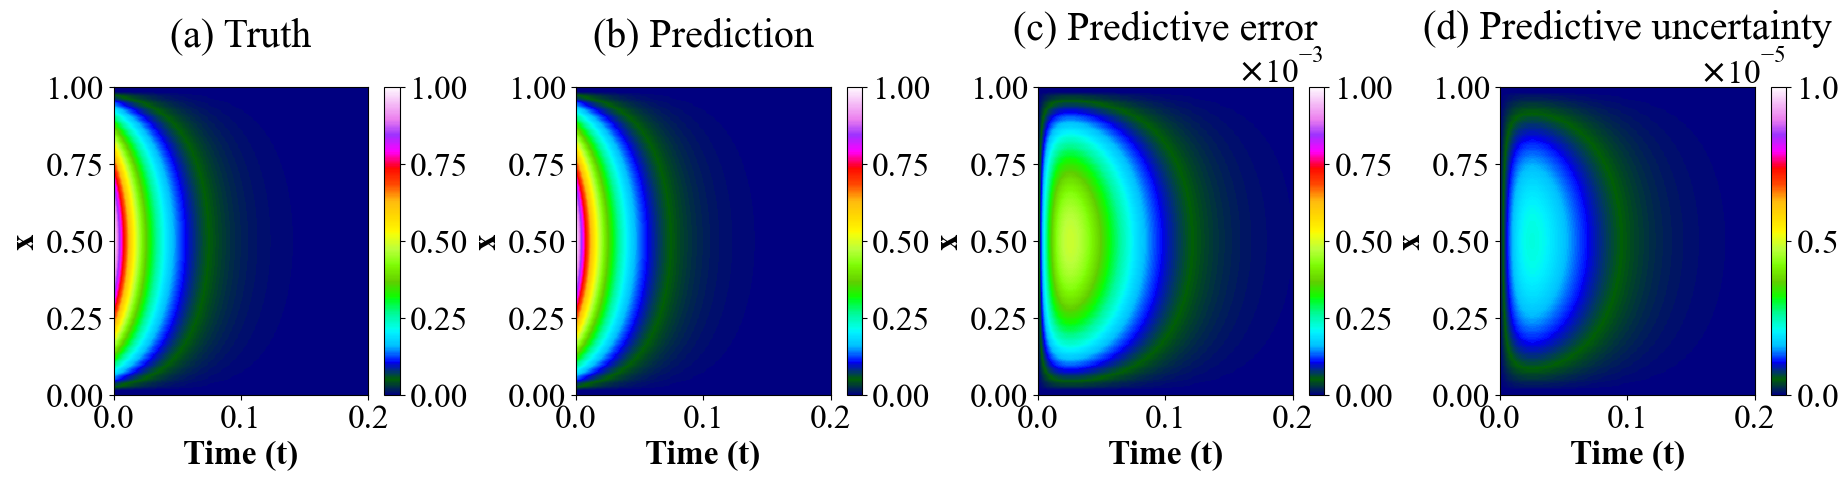

In [74]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(22,4))
fig1.subplots_adjust(wspace=0.45)

plt.subplot(1,4,1)
contour = plt.imshow(UN, cmap='gist_ncar', extent=[0,0.2,0,1], aspect='auto', origin='lower',
                    vmin=0, vmax=1)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(a) Truth', pad=30)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((-4, 4))
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,2)
contour = plt.imshow(UN_pred, cmap='gist_ncar', extent=[0,0.2,0,1], aspect='auto', origin='lower',
                    vmin=0, vmax=1)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(b) Prediction', pad=30)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((-4, 4))
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,3)
contour = plt.imshow(np.abs(UN_pred-UN), extent=[0,0.2,0,1], cmap='gist_ncar', aspect='auto', origin='lower',
                     vmin=0, vmax=0.001)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(c) Predictive error', pad=35)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_useMathText(True)
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,4)
contour = plt.imshow(std_pred, cmap='gist_ncar', extent=[0,0.2,0,1], aspect='auto', origin='lower',
                    vmin=0, vmax=0.00001)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(d) Predictive uncertainty', pad=35)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_useMathText(True)
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')
plt.show()

fig1.savefig('images/Prediction_1D_Heat.pdf', format='pdf', dpi=600, bbox_inches='tight')